In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [0]:
import warnings
warnings.filterwarnings("ignore")

**Задание 1**

Проанализировать набор данных и ответить на следующие вопросы:

1) Какой % наблюдений выходит за 05 и 95 перцентиль?

2) Какому закону распределения отвечают данные? На основе чего вы так решили?

[Ссылка на данные](https://drive.google.com/file/d/1fc8BGSjDiwbZW6rcr3mMSwAjU2T_BpGW/view?usp=sharing)

Описание данных:

* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 


*Вместе с ответом на задание приложить код*

In [0]:
task1 = pd.read_csv("/content/drive/My Drive/kaggle/test_1_1.csv", sep = ";", names = ["Numbers", "Metrics"], skiprows=1)

In [61]:
task1.head()

,Numbers,Metrics
0,1,1
1,2,1
2,3,4
3,4,1
4,5,1


In [0]:
task1.Metrics.describe()
# Отметим, что 
# 1. Выборка достаточно большая 
# 2. Распределение скошено влево
# 3. Данные неоднородные, большое среднеквадичное отклонение 

count    306839.000000
mean         10.146275
std          22.627378
min           1.000000
25%           1.000000
50%           2.000000
75%           7.000000
max         998.000000
Name: Metrics, dtype: float64

In [0]:
#1. Рассчитаем 5 и 95 перцентили
perc_pers = [5, 95]
perc = np.percentile(task1.Metrics, q = perc_pers)
print("Перцентиль {}%: {}, Перцентиль {}%: {}".format(perc_pers[0], perc[0], perc_pers[1], perc[1]))

Перцентиль 5%: 1.0, Перцентиль 95%: 52.0


In [0]:
# Рассчитаем % наблюдений, выходящих за 5 и 95 перцентили 
# Как можем заметить из статистики выше, в данных нет значения, меньшего единицы, поэтому рассчитаем для 95 перцентиля  
# Проверим: 
task_05 = task1[task1.Metrics < np.percentile(task1.Metrics, q = 5)]
print(task_05.shape[0])

task_95 = task1[task1.Metrics > np.percentile(task1.Metrics, q = 95)]
print("какой % наблюдений выходит за 05 и 95 перцентиль:", round(task_95.shape[0]/task1.shape[0]*100, 4))

0
какой % наблюдений выходит за 05 и 95 перцентиль: 4.9873


Text(0.5, 1.0, 'Гистограмма метрики')

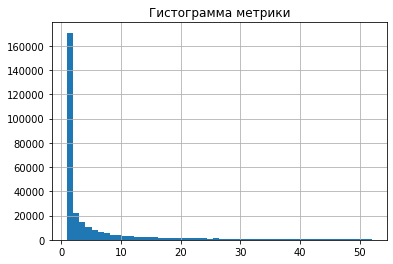

In [0]:
# Построим гистгорамму
# Также заметим, что распределение далеко от нормального  
task_n.hist(column = 'Metrics', bins = 50, label = 'Metrics')
plt.title('Гистограмма метрики')

In [0]:
# Формально проверим данные на нормальность распределения 
# Используем критерий Шапиро-Уилка 
# Н0: распределение нормальное 
# pvalue = 0 => на основе имеющихся данных отвергаем нулевую гипотезу в пользу альтернативы 
# Однако стоит отметить, что мощность критерия велика при большом объеме выборки 
print("Результаты теста Шапиро:", stats.shapiro(task_n['Metrics']))

Результаты теста Шапиро: (0.5769650936126709, 0.0)


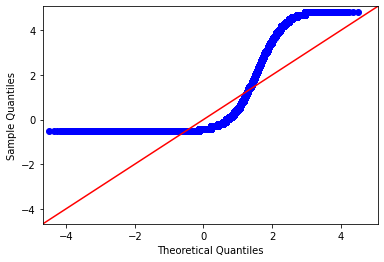

In [0]:
## QQ-Plot
from statsmodels.api import qqplot
fig = qqplot(data = task1.Metrics, dist = stats.norm, line="45", fit = True)

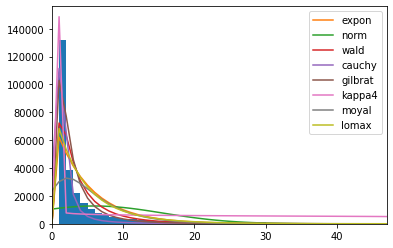

In [0]:
# Сначала попробуем вручную подобрать наилучшие распределения из scipy 
# Кажется, что лучше всех данные описывает cauchy, gilbrat, wald
# Normal и moyal описывают данные хуже всего 
import scipy
size = len(task1.Metrics.values)
y = task_n.Metrics.values
x = scipy.arange(size)
h = plt.hist(y, bins=range(60))

dist_names = ['expon', 'norm', 'wald', 'cauchy', 'gilbrat', 'kappa4', 'moyal', 'lomax']

plt.rcParams['figure.figsize'] = [13, 10]
for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(y)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) * size
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(0,47)
    plt.legend(loc='upper right')
plt.show()

In [0]:
pip install fitter

  Created wheel for fitter: filename=fitter-1.2.1-cp36-none-any.whl size=22008 sha256=bc2701cabc11789da13ad902763687426fb2bd10f5cebe8d62357b9d6f184d63
  Stored in directory: /root/.cache/pip/wheels/53/3a/55/e36b00733683c71d53430f6f4db91af4c727ba4339b1e654e6
Successfully built fitter


In [0]:
# Далее воспользуемся fitter'ом 
from fitter import Fitter
f = Fitter(task1.Metrics)
f.fit()

Fitted alpha distribution with error=0.0043473201289330925)
Fitted anglit distribution with error=0.006284350201424501)
SKIPPED arcsine distribution (taking more than 30 seconds)
SKIPPED argus distribution (taking more than 30 seconds)
SKIPPED beta distribution (taking more than 30 seconds)
SKIPPED betaprime distribution (taking more than 30 seconds)
SKIPPED bradford distribution (taking more than 30 seconds)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED burr12 distribution (taking more than 30 seconds)
Fitted cauchy distribution with error=0.004449059611721195)
SKIPPED chi distribution (taking more than 30 seconds)
SKIPPED chi2 distribution (taking more than 30 seconds)
SKIPPED cosine distribution (taking more than 30 seconds)
SKIPPED crystalball distribution (taking more than 30 seconds)
SKIPPED dgamma distribution (taking more than 30 seconds)
SKIPPED dweibull distribution (taking more than 30 seconds)
SKIPPED erlang distribution (taking more than 30 seconds)
Fitte

,sumsquare_error,aic,bic,kl_div
wald,0.000412,8206.488213,-6.268355e+06,inf
expon,0.000512,11347.281405,-6.201608e+06,inf
gilbrat,0.000767,3854.290641,-6.077462e+06,inf
moyal,0.000988,12304.505912,-5.999766e+06,inf
halflogistic,0.001066,12839.504293,-5.976609e+06,inf


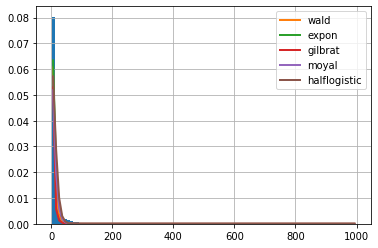

In [0]:
# Зафитим распределения из scipy на наших данных, выведем лучшие и отобразим их на графике 
# Видно, что лучшие распределения: wald, expon, gilbrat, moyal, halflogistic
f.summary()

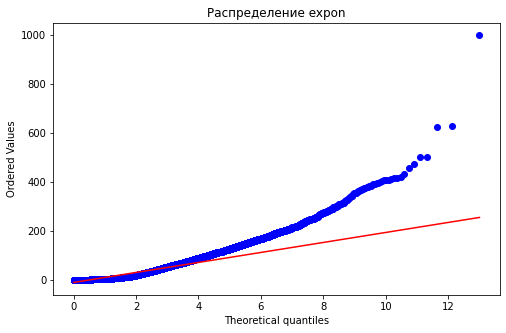

In [0]:
# Построим PP-Plots 
# dist_names = ['expon', 'wald', 'cauchy', 'gilbrat', 'kappa4', 'lomax']
# Согласно PP-plot'aм, наилучше данные описывают распределения expon, wald, gilbrat, lomax и fatiguelife (последнее было добавлено в качестве эксперимента)
plt.rcParams['figure.figsize'] = [8, 5]

stats.probplot(task1.Metrics.values, dist = stats.expon, plot=plt)
plt.title('Распределение expon')
plt.show()

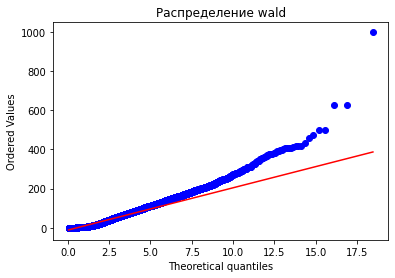

In [98]:
stats.probplot(task1.Metrics.values, dist = stats.wald, plot=plt)
plt.title('Распределение wald')
plt.show()

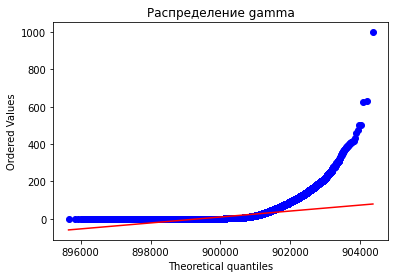

In [0]:
stats.probplot(task1.Metrics.values, dist = stats.gamma(900000), plot=plt)
plt.title('Распределение gamma')
plt.show()

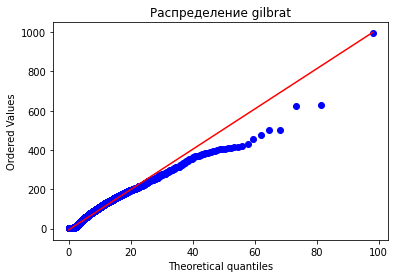

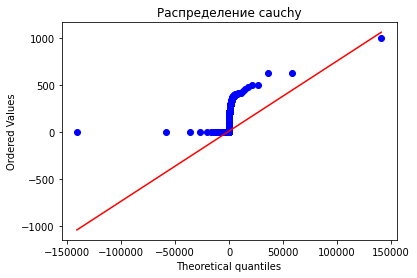

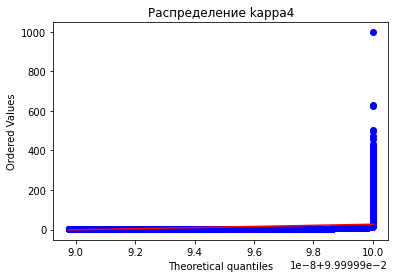

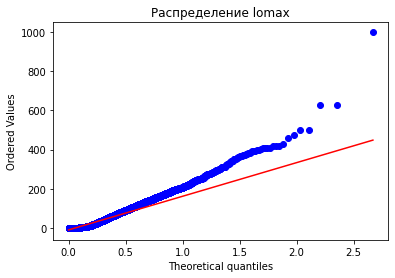

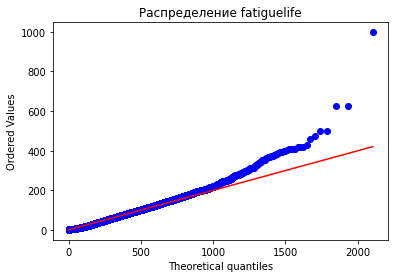

In [0]:
stats.probplot(task1.Metrics.values, dist = stats.gilbrat, plot=plt)
plt.title('Распределение gilbrat')
plt.show()

stats.probplot(task1.Metrics.values, dist = stats.cauchy, plot=plt)
plt.title('Распределение cauchy')
plt.show()

stats.probplot(task1.Metrics.values, dist = stats.kappa4(5, 10), plot=plt)
plt.title('Распределение kappa4')
plt.show()

stats.probplot(task1.Metrics.values, dist = stats.lomax(10), plot=plt)
plt.title('Распределение lomax')
plt.show()

stats.probplot(task1.Metrics.values, dist = stats.fatiguelife(10), plot=plt)
plt.title('Распределение fatiguelife')
plt.show()

In [0]:
# Таким образом, на основе полученных графиков и результатов фита распределения к данным можно предположить, что данные распределены согласно 
# wald или expon законам 


**Задание 2**

Определить, можно сравнить две представленные выборки t критерием Стьюдента? 

Если нельзя сравнивать t-критерием, то что будем использовать и почему?

Ответ аргументировать и описать 

[Ссылка на данные](https://drive.google.com/file/d/1blvC6TEBWghhVMexjOdoGEjzhZZh3wSy/view?usp=sharing)

Описание данных: 

* variant -- вариация в А/Б тесте (либо группа А -- например, сайт без изменений. Либо группа Б -- сайт с изменениями)
* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 

*Вместе с ответом на задание приложить код*

Итак, для применения t-критерия Стьюдента должны соблюдаться следующие условия в случае несвязанных выборок:  

* **Гомогенность дисперсий**: дисперсии внутри групп должны быть приблизительно одинаковыми
* **Нормальность распределения**: это особенно важно для маленьких выборок (меньше 30 наблюдений), однако для больших выборок иногда допустимо отклонение распределения выборочных данных от нормальности. 


In [0]:
task2 = pd.read_csv("/content/drive/My Drive/kaggle/test_1_2.csv", sep = ";", names = ["numbers", "variant", "metrics"], usecols = [1,2], skiprows = 1)
task2.head()

,variant,metrics
0,A,1
1,B,1
2,A,4
3,B,37
4,B,4


In [0]:
# Разделим данные на две группы 
task2_A = task2[(task2["variant"] == "A")]
task2_B = task2[(task2["variant"] == "B")]

# Описательные статистики 
# Отметим, что в данных много наблюдений, они распределены неровномерно

print('Sample A')
print(task2_A.describe())
print("--------------------")
print("\n")
print('Sample B')
print(task2_B.describe())
print("--------------------")
print("\n")

Sample A
            metrics
count  92686.000000
mean      10.099562
std       23.130148
min        1.000000
25%        1.000000
50%        2.000000
75%        7.000000
max      998.000000
--------------------


Sample B
            metrics
count  91518.000000
mean      10.333137
std       22.860695
min        1.000000
25%        1.000000
50%        2.000000
75%        7.000000
max      626.000000
--------------------




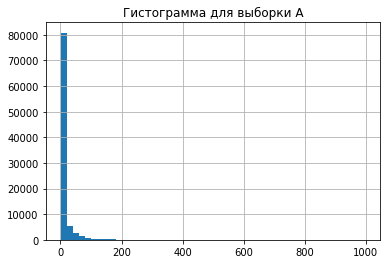

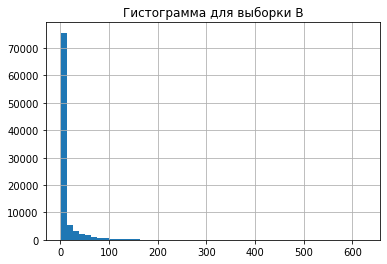

In [0]:
# Построим гистограммы:
# Отметим, что данные вероятно не рапсределены нормально 
task2_A.hist(column = 'metrics', bins = 50, label = 'Sample A')
plt.title('Гистограмма для выборки А')
task2_B.hist(column = 'metrics', bins = 50, label = 'Sample B')
plt.title('Гистограмма для выборки B')
plt.show()

In [0]:
# Применим тест Шапиро на нормальность распределения 
# H0: выборочное распределение имеет распределение хи-квадрат 
# pvalue = 0 => на основе имеющихся данных отвергаем нулевую гипотезу в пользу альтернативы 
# Наблюдения в обеих выборках не распределны нормально 
print("Тест Шапиро для выборки А: ", stats.shapiro(task2_A["metrics"]))
print("-------------------------------------")
print("\n")
print("Тест Шапиро для выборки B: ", stats.shapiro(task2_B["metrics"]))
print("-------------------------------------")
print("\n")

Тест Шапиро для выборки А:  (0.4299488663673401, 0.0)
-------------------------------------


Тест Шапиро для выборки B:  (0.45065927505493164, 0.0)
-------------------------------------




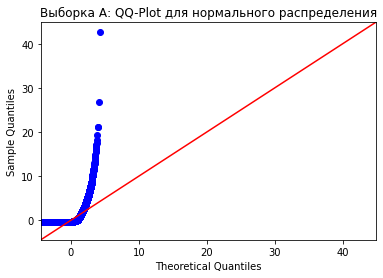

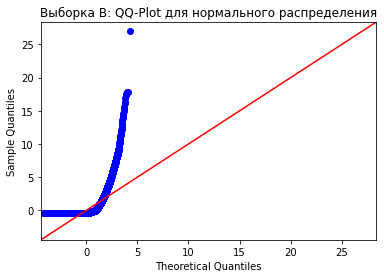

In [0]:
# Построим QQ-Plot 
fig = qqplot(task2_A["metrics"], stats.norm, line='45', fit=True)
plt.title("Выборка А: QQ-Plot для нормального распределения")

fig = qqplot(task2_B["metrics"], stats.norm, line='45', fit=True)
plt.title("Выборка B: QQ-Plot для нормального распределения");

# Как видно из графиков, данные не распределены нормально 

In [0]:
# Проверка на гомогенность дисперсии с помощью критерия Левена 
# H0: дисперсии гомогенны 
# pvalue < 0.05, на основании имеющихся у нас данных отвергаем нулевую гипотезу в пользу альтернативы 

from scipy.stats import levene
levene(task2_A["metrics"].values, task2_B["metrics"].values)

LeveneResult(statistic=4.313416821004634, pvalue=0.03781432358426188)

Так как условия использования t-критерия нарушены, будем использовать непараметрический U-критерий Манна-Уитни. 
 

In [0]:
# H0: значения характеристик выборок равны
# pvalue > 0.05, на имеющихся данных нет оснований отвергнуть нулевую гипотезу в пользу альтернативы 
# Между выборками нет статистически значимых различий 
print('Тест Манна-Уитни:', stats.mannwhitneyu(task2_A["metrics"].values, task2_A["metrics"].values))

Тест Манна-Уитни: MannwhitneyuResult(statistic=4295347298.0, pvalue=0.4999999819073227)


**Задание 3**

Дано две выборки по А/Б тесту.

Две выборки несбалансированные - кол-во пользователей в каждой группе разные.

Метрика, которую меряем в эксперименте (и которую используем для определения группы, которая лучше себя показала) - кол-во просмотренных страниц на пользователя 

Как вы будете принимать решение, какая группа лучше А или Б, и какие статистические методы (критерии) вы будете использовать, какие преобразования к данным применять? P.S. Вам может помочь лекция Виталия Черемисинова, где он рассказывал про А/Б тесты

[Ссылка на данные](https://drive.google.com/file/d/1_g7Dw7-8QzTS47D6GNKMb0FzqMAWBDba/view?usp=sharing)

Описание данных: 

* variant -- вариация в А/Б тесте (либо группа А -- например, сайт без изменений. Либо группа Б -- сайт с изменениями)
* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 


*Вместе с ответом на задание приложить код*

In [0]:
task3 = pd.read_csv("/content/drive/My Drive/kaggle/hw2_test_1_3.csv", sep = ";", names = ["Number", "Variant", "Metrics"], skiprows=1, usecols = [1,2])
task3.head()

,Variant,Metrics
0,A,1
1,A,4
2,A,15
3,A,1
4,A,10


In [0]:
# Итак, выборка А значительнее больше выборки D. 

task3_A = task3[task3['Variant'] == 'A']
task3_D = task3[task3['Variant'] == 'D']

print('Sample A')
print(task3_A.describe())
print("--------------------")
print("\n")
print('Sample D')
print(task3_D.describe())
print("--------------------")
print("\n")

Sample A
            Metrics
count  92686.000000
mean      10.099562
std       23.130148
min        1.000000
25%        1.000000
50%        2.000000
75%        7.000000
max      998.000000
--------------------


Sample D
            Metrics
count  15413.000000
mean       9.942386
std       21.802747
min        1.000000
25%        1.000000
50%        2.000000
75%        7.000000
max      406.000000
--------------------




In [0]:
# Проверка на гомогенность дисперсии с помощью критерия Левена 
# H0: дисперсии гомогенны 
# pvalue > 0.05 => нет оснований для отвержения нулевой гипотезы 

from scipy.stats import levene
levene(task3_A["Metrics"].values, task3_D["Metrics"].values)

# В противном случае можно было бы использовать Welch’s t-test

LeveneResult(statistic=0.6909401153215109, pvalue=0.40584663266049437)

In [0]:
# Формально проверим данные на нормальность распределения 
# Используем критерий Шапиро-Уилка 
# Н0: распределение нормальное 
# pvalue = 0 => на основе имеющихся данных отвергаем нулевую гипотезу в пользу альтернативы 
# Однако стоит отметить, что мощность критерия велика при большом объеме выборки 
print("Результаты теста Шапиро для sample A:", stats.shapiro(task3_A["Metrics"].values))
print("Результаты теста Шапиро для sample D:", stats.shapiro(task3_D["Metrics"].values))

Результаты теста Шапиро для sample A: (0.4299488663673401, 0.0)
Результаты теста Шапиро для sample D: (0.4525006413459778, 0.0)


In [0]:
# Мы не можем использовать параметрические тесты, так как нарушаются предположения о нормальности распределения
# Используем непараметрику, т.к. не берет в учет выборочный параметр 
# Непараметрический тест Манна-Уитни 
print('Тест Манна-Уитни:', stats.mannwhitneyu(task3_A["Metrics"].values, task3_D["Metrics"].values))
# H0: значения характеристик выборок равны
# pvalue > 0.05 => на основе имеющихся данных есть основания для отвержения нулевой гипотезы в пользу альтернативы
# можем заключить, что между выборками наблюдаются статистически значимые различия  

Тест Манна-Уитни: MannwhitneyuResult(statistic=710155085.5, pvalue=0.11455772745929804)


In [0]:
# Также при сравнении несбалансированных выборок можно использовать bootstrap: 
# https://stats.stackexchange.com/questions/136661/using-bootstrap-under-h0-to-perform-a-test-for-the-difference-of-two-means-repl 
# https://github.com/wblakecannon/DataCamp/blob/master/07-statistical-thinking-in-python-(part-2)/3-introduction-to-hypothesis-testing/a-two-sample-bootstrap-hypothesis-for-difference-of-means.py 
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])

In [0]:
mean_force = np.mean(task3.Metrics)
task3_A_shifted = task3_A.Metrics.values - np.mean(task3_A.Metrics.values) + mean_force
task3_D_shifted = task3_D.Metrics.values - np.mean(task3_D.Metrics.values) + mean_force

bs_replicates_a = draw_bs_reps(task3_A_shifted, np.mean, size=10000)
bs_replicates_b = draw_bs_reps(task3_D_shifted, np.mean, size=10000)

bs_replicates = bs_replicates_a - bs_replicates_b

empirical_diff_means = np.mean(task3_A.Metrics.values) - np.mean(task3_D.Metrics.values)

p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p) 

p-value = 0.2054


In [0]:
# Таким образом, можем сделать вывод о статистических различиях двух выборок. 

**Задание 4**

Есть данные с большой дисперсии у метрики (диспресию метрики можно посчитать для каждой группы). Для их дальнейшего анализа дисперсию необходимо сократить. Как определить, что дисперсия действительно большая? Если она большая, как вы будете ее чистить? Ответ аргументировать и описать.  P.S. Вам может помочь лекция Виталия Черемисинова, где он рассказывал про А/Б тесты

Описание данных: 

* variant -- вариация в А/Б тесте (либо группа А -- например, сайт без изменений. Либо группа Б -- сайт с изменениями)
* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 

[Ссылка на данные](https://drive.google.com/file/d/1fc8BGSjDiwbZW6rcr3mMSwAjU2T_BpGW/view?usp=sharing)

*Вместе с ответом на задание приложить код*

In [4]:
task4 = pd.read_csv("/content/drive/My Drive/kaggle/test_1_1.csv", sep = ";", names = ["Numbers", "Metrics"], skiprows=1)
task4.head()

,Numbers,Metrics
0,1,1
1,2,1
2,3,4
3,4,1
4,5,1


In [5]:
task4.Metrics.describe()
# Отметим высокое среднеквадратичное отклонение 

count    306839.000000
mean         10.146275
std          22.627378
min           1.000000
25%           1.000000
50%           2.000000
75%           7.000000
max         998.000000
Name: Metrics, dtype: float64

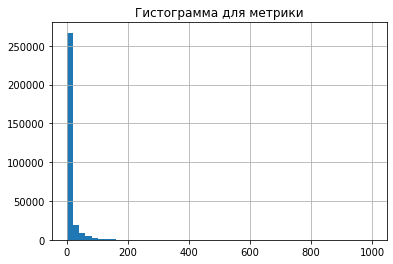

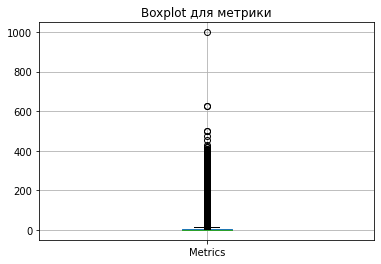

In [57]:
# Посмотрим на гистограмму 
# Можем отметить, что распределение скошено, концы длинные  
task4.hist(column = 'Metrics', bins = 50)
plt.title('Гистограмма для метрики')
plt.show()

# Также посмотрим на среднее и выбросы при помощи boxplot'а

task4.boxplot(column = 'Metrics')
plt.title('Boxplot для метрики')
plt.show()
# Как видим, среднее близко к нулю

In [22]:
# Рассчитаем коэффициент вариации -- он показывает степень изменчивости по отношению к среднему показателю 
# Считается, что большой коэффициент вариации -- больший 33% 
print('Коэффициент вариации до преобразований', round(task4['Metrics'].std()/task4['Metrics'].mean()*100, 2), '%', end = '\n')

Коэффициент вариации до преобразований 223.01 %


count    232596.000000
mean          2.064842
std           1.598625
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max           7.000000
Name: Metrics, dtype: float64


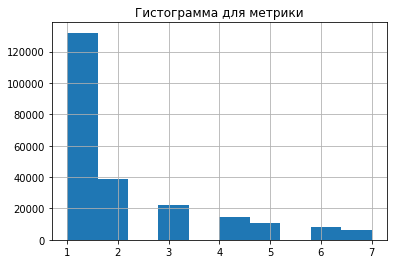

Коэффициент вариации после удаления выбросов  77.42 %


In [54]:
# Первый вариант: просто удалить выбросы 
task4_v1 = task4[(task4['Metrics'] >= task4['Metrics'].quantile(q = 0.05,  interpolation = 'midpoint')) &
                (task4['Metrics'] <= task4['Metrics'].quantile(q = 0.75,  interpolation = 'midpoint'))]
print(task4_v1.Metrics.describe())
# Стандартное отклонение значительно сократилось 

# Построим гистограмму 
task4_v1.hist(column = 'Metrics', bins = 10)
plt.title('Гистограмма для метрики')
plt.show()

print('Коэффициент вариации после удаления выбросов ', round(task4_v1['Metrics'].std()/task4_v1['Metrics'].mean()*100, 2), '%', end = '\n')

In [65]:
# Второй вариант: преобразование Бокса-Кокса 
task4_v2 = stats.boxcox(task4.Metrics)
print(task4_v2[0].std())
print('Коэффициент вариации после преобразования Бокса-Кокса', round(task4_v2[0].std()/task4_v2[0].mean()*100, 2), '%', end = '\n')

0.6589095507155223
Коэффициент вариации после преобразования Бокса-Кокса 99.22 %


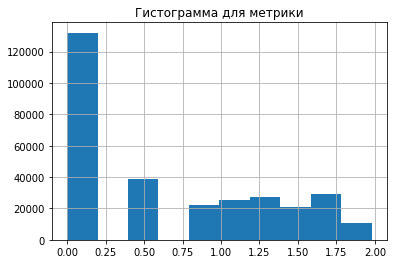

In [70]:
# Построим гистограмму 
pd.Series(task4_v2[0]).hist(bins = 10)
plt.title('Гистограмма для метрики')
plt.show()

count    306839.000000
mean          1.153210
std           1.348784
min           0.000000
25%           0.000000
50%           0.693147
75%           1.945910
max           6.905753
Name: Metrics, dtype: float64
Коэффициент вариации после логарфмического преобразования 116.96 %


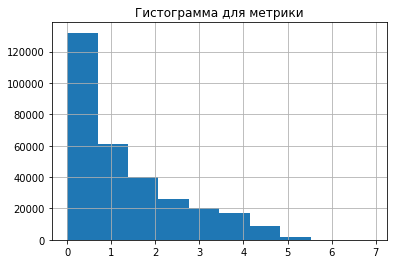

In [76]:
# Логарифмическое преобразование 
print(np.log(task4.Metrics).describe())
print('Коэффициент вариации после логарфмического преобразования', round(np.log(task4.Metrics).std()/np.log(task4.Metrics).mean()*100, 2), '%', end = '\n')

# Построим гистограмму 
pd.Series(np.log(task4.Metrics)).hist(bins = 10)
plt.title('Гистограмма для метрики')
plt.show()

**Задание 5**

Есть эксперимент с поисковыми подсказками. Вы хотим узнать, как изменился CTR в каждой группе эксперимента.

**Данные**

- action - кол-во кликов на одну сессию
- view- кол-во просмотров на одну сессию
- variant - вариант a/b теста, где 0 - это версия "A", 1 -  версия "B".

**Задача**

- сформировать метрику для оценки эксперимента
- подобрать критерий под особенности данных
- сделать вывод о значимости эффекта

**Данные** 

[Ссылка на данные](https://www.dropbox.com/s/ji2l0lypvhs3yz5/data_for_test_1.csv)

In [99]:
task5 = pd.read_csv("/content/drive/My Drive/kaggle/data_for_test_1.csv")
print(task5.head())
print("\n")
task5["action"] = [float(i.replace(',', '.')) for i in task5.action]
task5["view"] = [float(i.replace(',', '.')) for i in task5.view]

print(task5.describe())

        user_id  variant        view      action
0  74823.975530        0  228,168018  5,35953276
1  21976.056693        1  620,030096   8,8021457
2  92914.551944        0  579,260512  2,57917939
3  46623.642233        1  259,627162  5,41485985
4  47997.129993        0  416,715865  10,7477056


            user_id       variant          view        action
count  10000.000000  10000.000000  10000.000000  10000.000000
mean   54926.068431      0.500000    528.496269      9.889013
std    25982.541845      0.500025    274.422036      5.724645
min    10029.166236      0.000000     50.012071      0.000843
25%    33181.356034      0.000000    290.877005      4.926735
50%    53328.180735      0.500000    530.734551      9.915244
75%    77142.354732      1.000000    763.495584     14.807967
max    99983.955885      1.000000    999.962552     19.996716


In [0]:
# Метрика: количество кликов на количество просмотров на одну сессию 
task5["metrics"] = task5.action/task5.view

In [0]:
task5_0 = task5[task5['variant'] == 0]
task5_1 = task5[task5['variant'] == 1]

In [102]:
# Чтобы выбрать используемый критерий, проверим данные на нормальность 
# Используем критерий Шапиро-Уилка 
# Н0: распределение нормальное 
# pvalue = 0 => на основе имеющихся данных отвергаем нулевую гипотезу в пользу альтернативы 
# Однако стоит отметить, что мощность критерия велика при большом объеме выборки 
print("Результаты теста Шапиро для 0 группы:", stats.shapiro(task5_0["metrics"].values))
print("Результаты теста Шапиро: для 1 группы", stats.shapiro(task5_1["metrics"].values))

Результаты теста Шапиро для 0 группы: (0.6218699812889099, 0.0)
Результаты теста Шапиро: для 1 группы (0.6330718398094177, 0.0)


In [103]:
# Используем непараметрический критерий Манна-Уитни, так как данные не распределны нормально

# H0: значения характеристик выборок равны
# pvalue > 0.05, на имеющихся данных нет оснований отвергнуть нулевую гипотезу в пользу альтернативы 
# Между выборками нет статистически значимых различий 
# Можем сделать вывод о незначимости эффекта 
print('Тест Манна-Уитни:', stats.mannwhitneyu(task5_0["metrics"].values, task5_1["metrics"].values))

Тест Манна-Уитни: MannwhitneyuResult(statistic=12437340.0, pvalue=0.33210934831189537)


In [118]:
# Также можно использовать bootstrap 
# Используем код из предыдущего задания

mean_force = np.mean(task5["metrics"])
task3_0_shifted = task5_0["metrics"].values - np.mean(task5_0["metrics"].values) + mean_force
task3_1_shifted = task5_1["metrics"].values - np.mean(task5_1["metrics"].values) + mean_force

bs_replicates_0 = draw_bs_reps(task3_0_shifted, np.mean, size=10000)
bs_replicates_1 = draw_bs_reps(task3_1_shifted, np.mean, size=10000)

bs_replicates = bs_replicates_0 - bs_replicates_1

empirical_diff_means = np.mean(task5_0["metrics"].values) - np.mean(task5_1["metrics"].values)

p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p) 

# pvalue > 0.05 => на основании имеющихся данных нет оснований отвергнуть нулевую гипотезу
# можем сделать вывод о незначимости эффекта 

p-value = 0.6637


In [121]:
# Или воспользуемся реализацией из библиотеки 

from bootstrapped import bootstrap as bs
from bootstrapped import compare_functions as bs_cmp
from bootstrapped import stats_functions as bs_st


bs_ab_estims = bs.bootstrap_ab(np.array(task5_0["metrics"]), np.array(task5_1["metrics"]), 
                               bs_st.mean, bs_cmp.difference, 
                               num_iterations=10000, alpha=0.05/3, 
                               iteration_batch_size=100, scale_test_by=1, 
                               num_threads=4)
bs_ab_estims

# Как можно заметить, CI включает ноль, следовательно, можем говорить об отсутствии статистически значимых различий между группами 

-0.00035533458179805993    (-0.0023849221362866545, 0.0016648236441987375)